# Retail Price Optimization


**Business Problem**

FashionElite is a clothing retailer specializing in a diverse selection of apparel and accessories, operating both physical stores and an online e-commerce platform. To enhance its revenue and market competitiveness, the company aims to optimize its pricing strategy.

FashionElite faces several challenges in effectively pricing its products.

- Competitive Landscape: With numerous rivals offering similar products, the retail industry is highly competitive. FashionElite aims to stand out by offering attractive prices while ensuring profitability. 

- Inventory Management: Ensuring effective inventory management is vital for FashionElite, as pricing strategies must balance supply and demand. Optimizing prices based on inventory levels can help prevent overstocking or understocking of products. 

- Seasonal and Trend Variations: The fashion industry's rapid trend changes and fluctuating demand throughout the year present challenges for FashionElite. Adjusting prices to reflect seasonal and trend shifts is crucial to capitalize on sales opportunities.


**Solution**

Price Optimization can be used for tacking above challenges. We will be trying the following strategies

- Demand based pricing : The demand-based pricing strategy involves analyzing the demand for each product over time
to determine the optimal price for each product. The strategy involves setting a base
price for each product, and then adjusting the price based on the demand for the product.

- Competitor based pricing : The competitor-based pricing strategy involves analyzing the prices of competitors for
the same product and adjusting the price based on the competitor’s pricing.

- Price elasticity based pricing : The price elasticity-based pricing strategy involves analyzing the price elasticity of
each product to determine the optimal price for each product. The strategy involves
setting a base price for each product, and then adjusting the price based on the
price elasticity of the product.

**Metric**

We will use amount of revenue earned as a metric

**Dataset** 
[Link from Kaggle](https://www.kaggle.com/datasets/suddharshan/retail-price-optimization)

| Field                      | Description                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------|
| product_id                 | A unique identifier for each product in the dataset.                                          |
| product_category_name      | The name of the product category to which the product belongs.                                |
| month_year                 | The month and year of the retail transaction or data recording.                                |
| qty                        | The quantity of the product sold or purchased in a given transaction.                          |
| total_price                | The total price of the product, including any applicable taxes or discounts. Calculated using qty*unit_price |
| freight_price              | The average freight price associated with the product.                                         |
| unit_price                 | The average unit price of a single unit of the product.                                        |
| product_name_length       | The length of the product name in terms of the number of characters.                           |
| product_description_length| The length of the product description in terms of the number of characters.                    |
| product_photos_qty        | The number of photos available for the product in the dataset.                                  |
| product_weight_g           | The weight of the product in grams.                                                            |
| product_score              | Average product rating associated with the product’s quality, popularity, or other relevant factors. |
| customers                  | The number of customers who purchased the product in a given category.                          |
| weekday                    | Number of weekdays in that month.                                                              |
| weekend                    | Number of weekends in that month.                                                              |
| holiday                    | Number of holidays in that month.                                                              |
| month                      | The month in which the transaction occurred.                                                   |
| year                       | The year in which the transaction occurred.                                                    |
| s                          | The effect of seasonality.                                                                     |
| Volume                     | Product Volume                                                                                 |
| Comp_1                     | Competitor1 price                                                                             |
| Ps1                        | Competitor1 product rating                                                                    |
| Fp1                        | Competitor1 freight price                                                                     |
| Comp_2                     | Competitor2 price                                                                             |
| Ps2                        | Competitor2 product rating                                                                    |
| Fp2                        | Competitor2 freight price                                                                     |
| Comp_3                     | Competitor3 price                                                                             |
| Ps3                        | Competitor3 product rating                                                                    |
| Fp3                        | Competitor3 freight price                                                                     |
| Lag_price                  | Previous month price of the product.                                                          | 


In [3]:
import pandas as pd
import duckdb as db
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [4]:
df=pd.read_csv("./price_optimsation_dataset.csv")
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
df["month_year"]=pd.to_datetime(df["month_year"], format="%d-%m-%Y")

In [7]:
df_grouped=df.groupby(["month_year"])["total_price"].sum().reset_index()
df_grouped["ori_cum_total_price"] = df_grouped["total_price"].cumsum()
df_grouped["month_name_year"] = df_grouped["month_year"].dt.strftime("%b-%Y")

In [8]:
products=db.sql(""" select 
                distinct product_id
                , product_category_name
                , product_name_lenght
                , product_description_lenght
                , product_photos_qty
                , product_weight_g
                , product_score
                from df """).to_df()

# EDA

## Monthly Revenue

In [9]:
eda_df_grouped = df.groupby(["month_year"]).agg({"total_price": "sum", 'qty':"sum", "holiday":"first", "weekday":"first"}).reset_index().rename(columns={"holiday": "Holiday Count"})
eda_df_grouped["month_name_year"] = eda_df_grouped["month_year"].dt.strftime("%b-%Y")

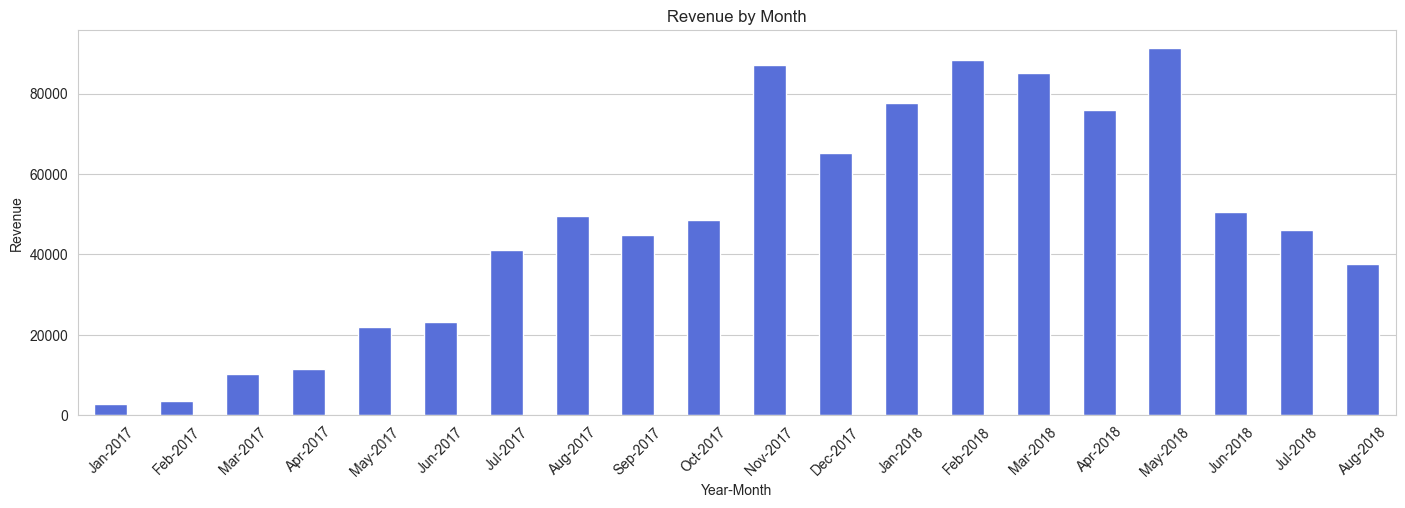

In [10]:
plt.figure(figsize=(17,5))
sns.barplot(x="month_name_year", y="total_price", data=eda_df_grouped, width=0.5, color="#4361EE");
plt.title("Revenue by Month")
plt.xlabel("Year-Month")
plt.ylabel("Revenue");
plt.xticks(rotation=45);

### Observations

- Revenue steadily grew till Feb 2017, but started declining after that
- Revenue was highest during November 2017 and May 2018


## Cumulative Revenue

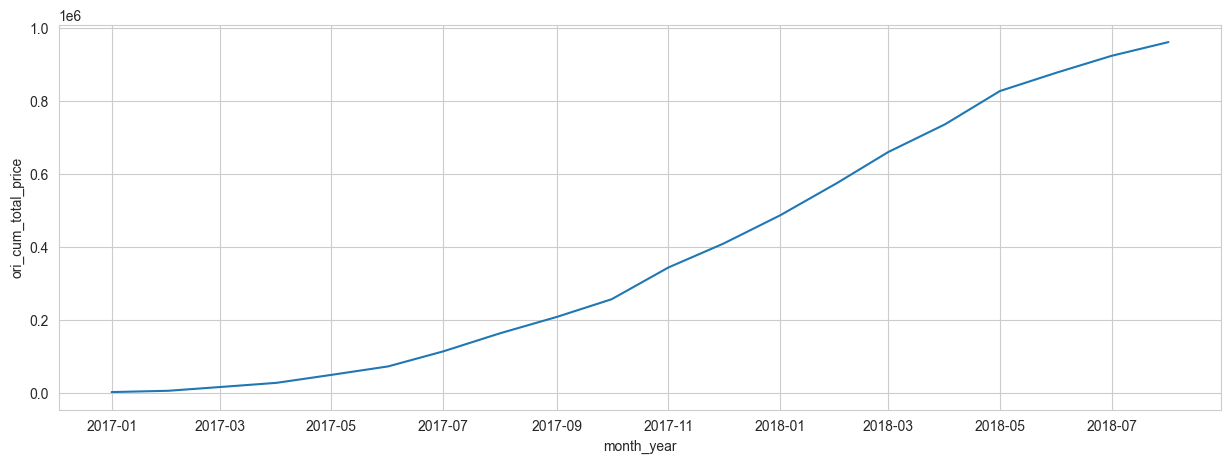

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_grouped, x="month_year", y="ori_cum_total_price");

## Holiday Effect

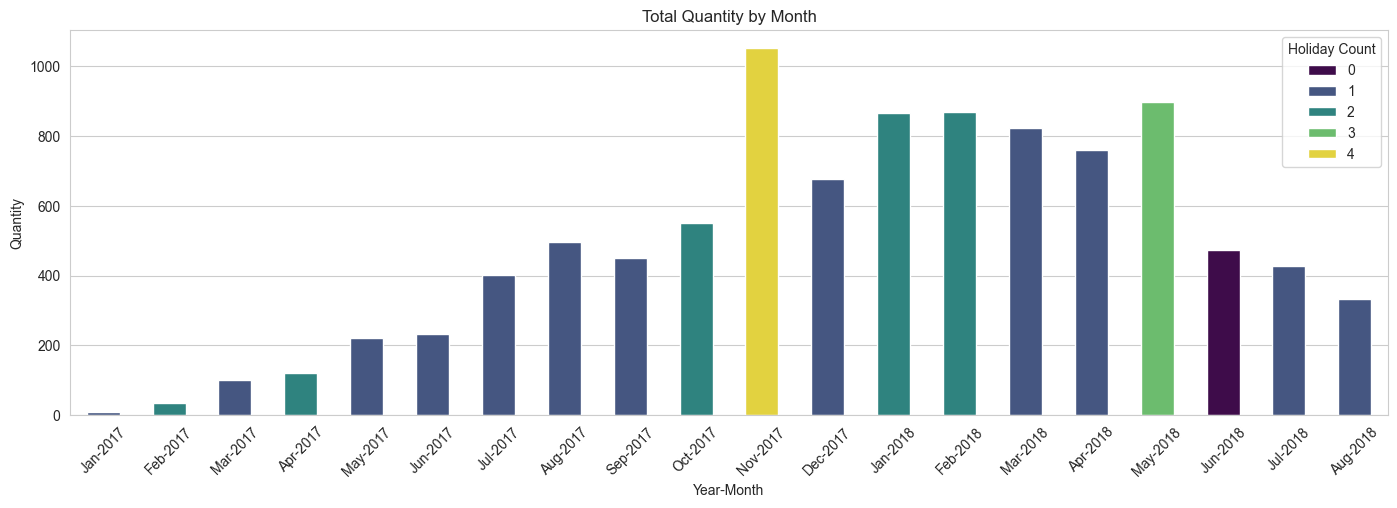

In [12]:
plt.figure(figsize=(17,5))
sns.barplot(data=eda_df_grouped, x="month_name_year", y="qty", hue="Holiday Count", width=0.5, palette="viridis");
plt.title("Total Quantity by Month")
plt.xlabel("Year-Month")
plt.ylabel("Quantity");
plt.xticks(rotation=45);

### Observations

- Nov 2017 and May 2018 have increased number of sales
- This is because of having higher number of holidays for these months


## Product Score Distribution

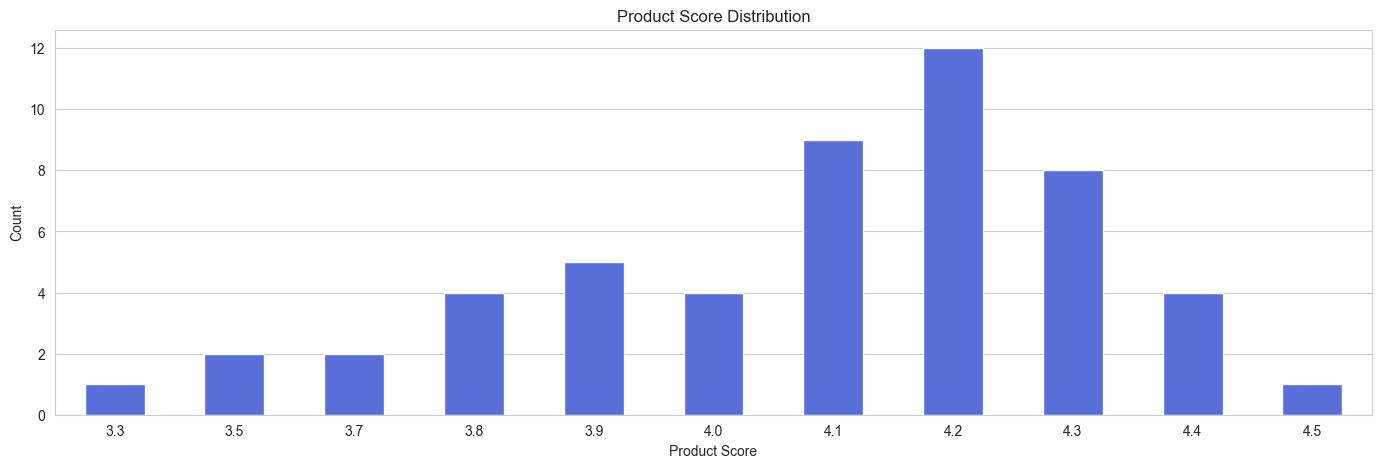

In [13]:
plt.figure(figsize=(17,5))
sns.countplot(data=products, x="product_score", color="#4361EE", width=0.5);
plt.title("Product Score Distribution")
plt.xlabel("Product Score")
plt.ylabel("Count");

### Observations

- We can see that 3.3 is minimum rating and 4.5 is the maximum rating.
- Majority of products have rating around 4.2, which indicates that customers like the products


## Product Weight Analysis

In [14]:
weight_df=df[[ "product_weight_g",'qty']].copy()
weight_df["product_weight_g"] = pd.cut(weight_df["product_weight_g"], bins=[0, 3000, 6000, 9000,15000])
weight_df=weight_df.groupby("product_weight_g" , observed=True)["qty"].sum().reset_index()
weight_df

,product_weight_g,qty
0,"(0, 3000]",8493
1,"(3000, 6000]",439
2,"(6000, 9000]",713
3,"(9000, 15000]",154


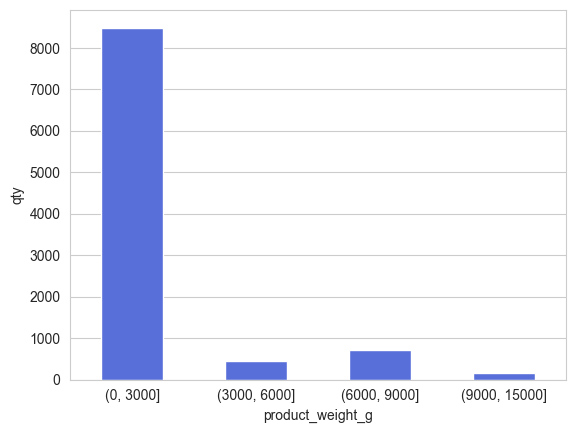

In [15]:
sns.barplot(data=weight_df, y="qty", x="product_weight_g", color="#4361EE", width=0.5);

- We can see that most of the products are in the range of 0-3000 grams.

## Product Description Length and Photo Analysis

In [16]:
description_df=df[[ "product_description_lenght",'qty']].copy()
description_df["description_length"] = pd.cut(description_df["product_description_lenght"], bins=[0, 1000, 2000, 4000])
description_df=description_df.groupby("description_length" , observed=True)["qty"].sum().reset_index()
description_df

,description_length,qty
0,"(0, 1000]",7837
1,"(1000, 2000]",1424
2,"(2000, 4000]",538


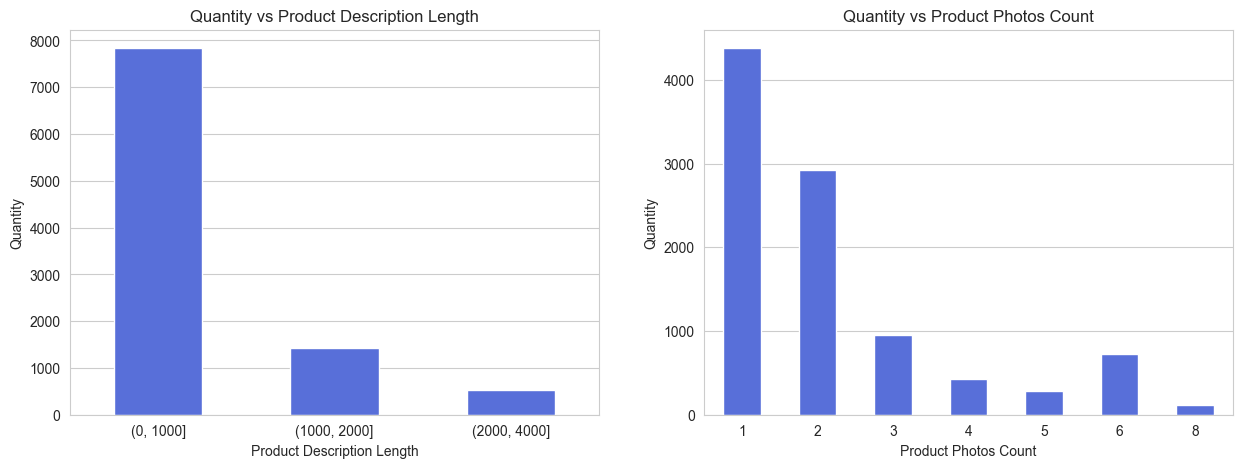

In [17]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(data=description_df, y="qty", x="description_length", ax=ax[0], color="#4361EE", width=0.5)
sns.barplot(data=df.groupby("product_photos_qty")["qty"].sum().reset_index(), y="qty", x="product_photos_qty", ax=ax[1],  width=0.5, color="#4361EE")
# plt.suptitle("Quantity vs Product Description Length and Product Photos Count")
ax[0].set_title("Quantity vs Product Description Length")
ax[0].set_ylabel("Quantity")
ax[0].set_xlabel("Product Description Length")
ax[1].set_title("Quantity vs Product Photos Count")
ax[1].set_ylabel("Quantity")
ax[1].set_xlabel("Product Photos Count");

### Observations

- Description length should be around 1000 characters
- 2-3 photos per product are sufficient. Having more does not have big effect on quantity bought


## Top Category

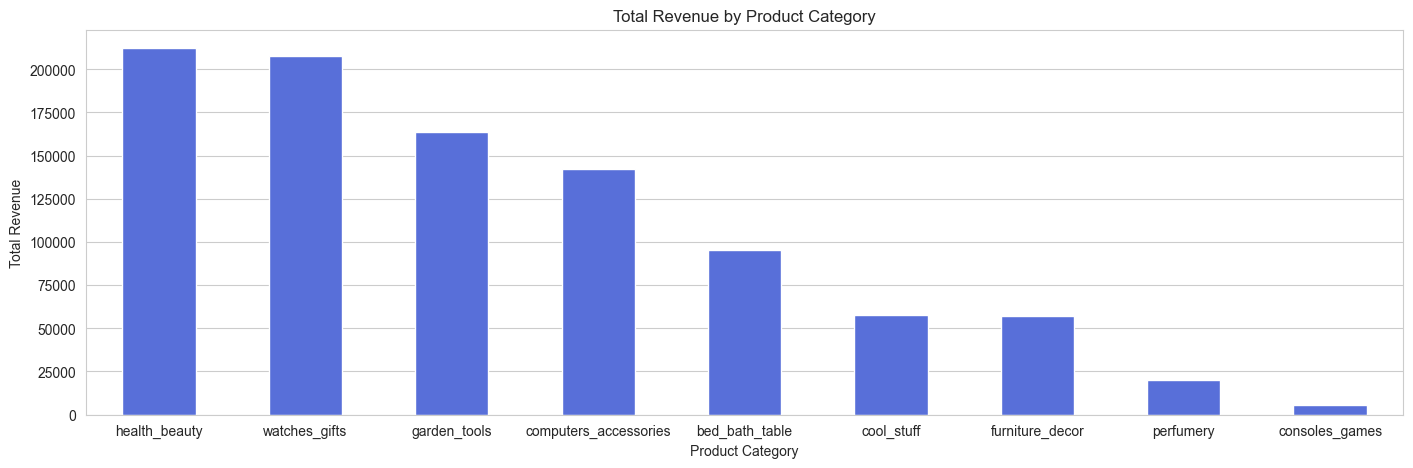

In [18]:
plt.figure(figsize=(17,5))
top_pc=df.groupby(["product_category_name"])["total_price"].sum().reset_index().sort_values(by="total_price",ascending=False)
sns.barplot(data=top_pc, x="product_category_name", y="total_price", width=0.5, color="#4361EE");
plt.xticks(rotation=0);
plt.title("Total Revenue by Product Category");
plt.xlabel("Product Category")
plt.ylabel("Total Revenue");

<b style="padding: 2px 8px;border-radius: 5px;background: #00008B;color: #fff;display: inline-block;">Observations</b>

- Health-Beauty and Watches-Gift category has the highest revenue


## Top Product

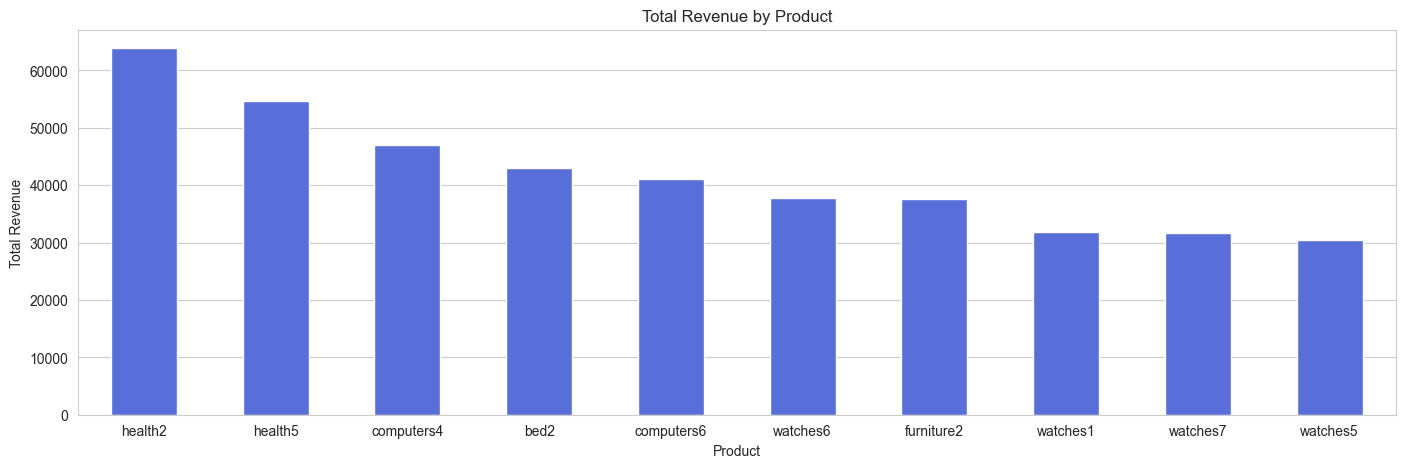

In [19]:
plt.figure(figsize=(17,5))
top_p=df.groupby(["product_id"])["total_price"].sum().reset_index().sort_values(by="total_price",ascending=False).head(10)
sns.barplot(data=top_p, x="product_id", y="total_price", width=0.5, color="#4361EE");
plt.xticks(rotation=0);
plt.title("Total Revenue by Product");
plt.xlabel("Product")
plt.ylabel("Total Revenue");

### Observations

- Health2, Health5 and Computer4 are the top 3 products by revenue


## Product Category Monthly Analysis

In [20]:
pcn_df=df.groupby(["product_category_name", "month_year"])["total_price"].sum().reset_index().rename(columns={"product_category_name": "Product Category"})
pcn_df["month_name_year"] = pcn_df["month_year"].dt.strftime("%b-%Y")
pcn_df=pcn_df.set_index("month_name_year")
pcn_df=pcn_df.sort_values(by="month_year")

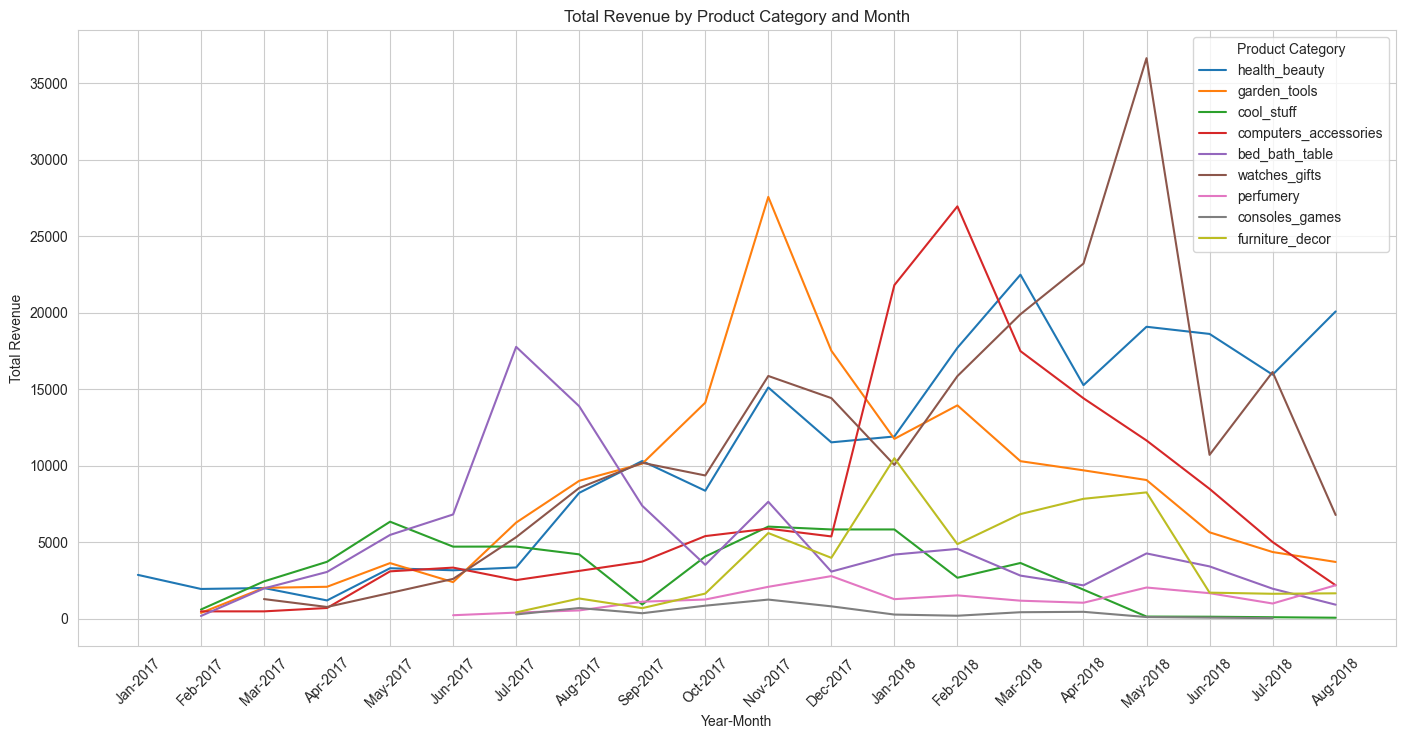

In [21]:
plt.figure(figsize=(17,8))
sns.lineplot(data=pcn_df, x="month_name_year", y="total_price", hue="Product Category");
plt.title("Total Revenue by Product Category and Month");
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue");
plt.xticks(rotation=45);


### Observations

- Console games have the lowest demand when compared with other categories
- Demand for health and beauty products had a steady increase
- Demand for bed bath table had a sudden increase at the start but fell after August 2017
- Demand for garden tools increased till November 2017 but fell after that


In [22]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

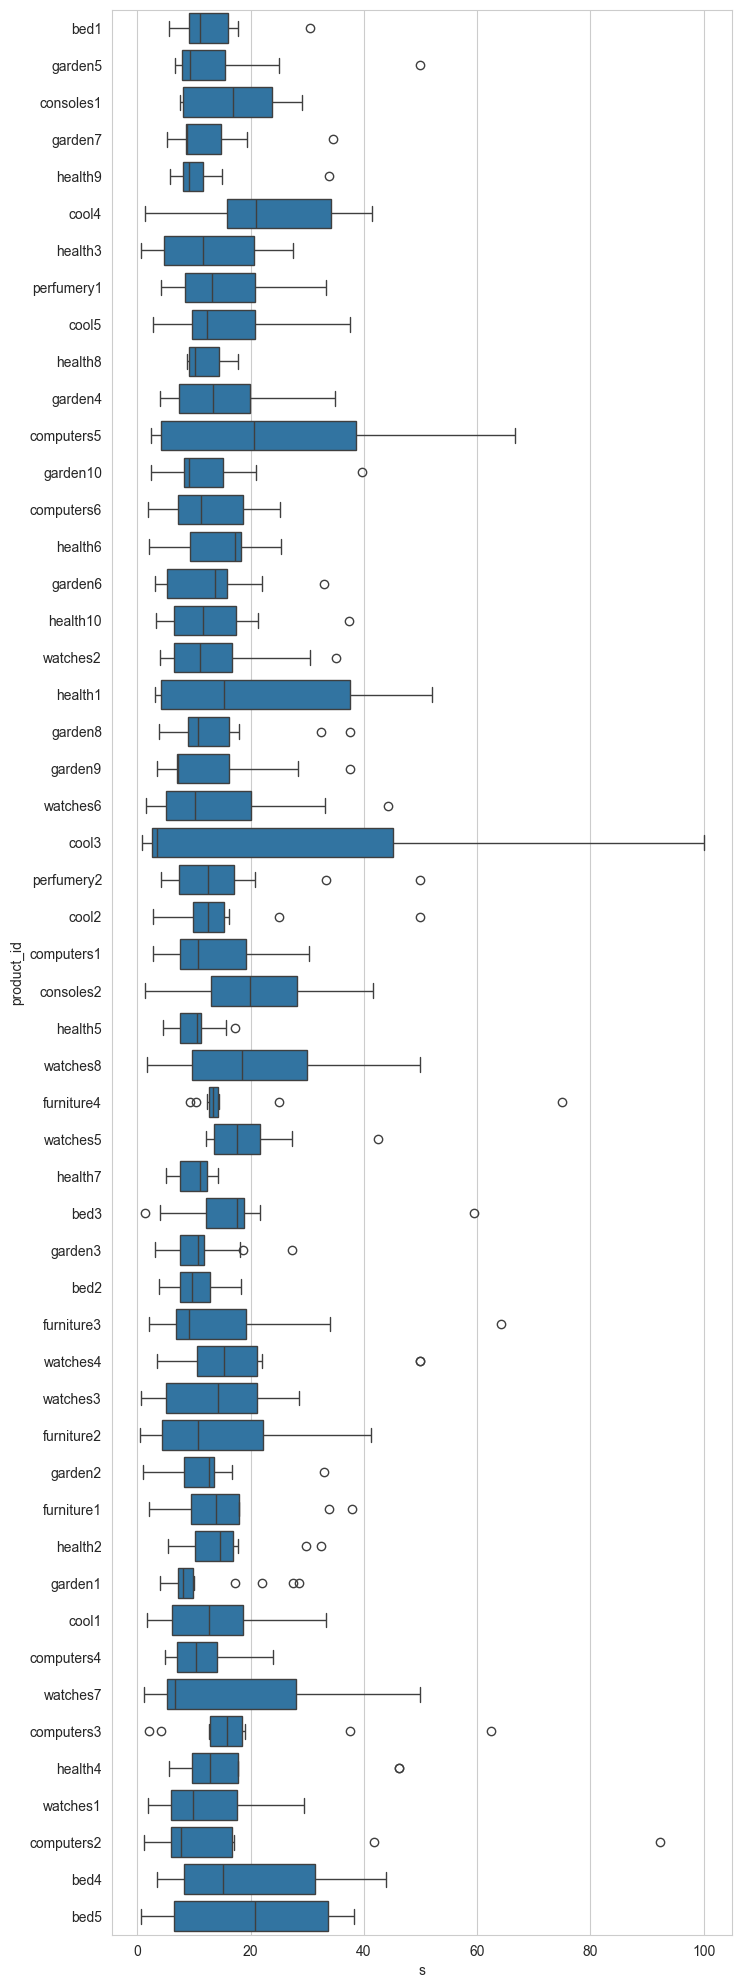

In [23]:
plt.figure(figsize=(8,25))
sns.boxplot(data=df, x="s", y="product_id");


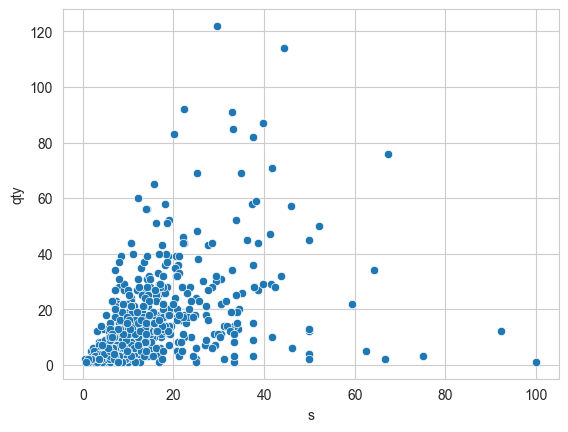

In [24]:
sns.scatterplot(data=df, x="s", y="qty");

# Pricing Strategies

- Value Based
- Competitor Based
- Price Elasticity to Demand Based

Following was the assumption made while optimizing the product price. 

The numbers of the customers, freight price were kept same as present in original dataset.



# Value Based Pricing

In this strategy we will use product score to adjust prices. ie Higher product score will have slower price depreciation as compared to lower product score 

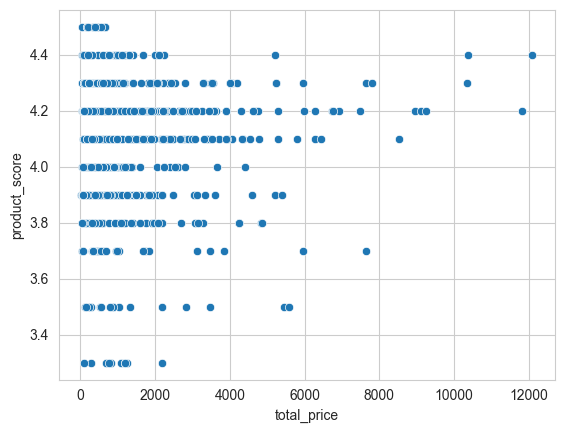

In [25]:
sns.scatterplot(data=df, x="total_price", y="product_score");

### Observations

- From above plot we can see that products with high product_score have high total_price

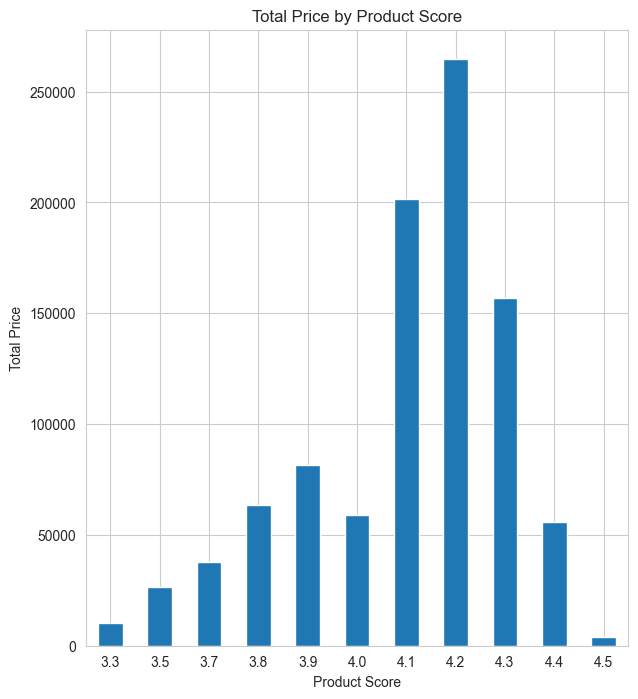

In [26]:
plt.figure(figsize=(7,8))
df.groupby(["product_score"])["total_price"].sum().plot(kind="bar");
plt.title("Total Price by Product Score");
plt.xlabel("Product Score")
plt.ylabel("Total Price");
plt.xticks(rotation=0);


### Observations

- From the plot we can see that products with rating above 4 have higher sales. 
- We can leverage this by adjusting the price depreciation rate over time based on product rating 
- Prices with high product score will depreciate slowly


In [27]:
"""
In the following code 
- we get the base price and ending price for each product by taking the first unit price and last unit price for each product.
- we get the max and min price for each product.
- we merge all the dataframes to get the final dataframe.
- we calculate the months difference between the base month and ending month.
- we calculate the depreciation rate for each product.
- we remap the product score to a range between 0 and 1.
- we calculate the new depreciation rate by subtracting the product score from the depreciation rate.
- we calculate the new ending price by subtracting the new depreciation rate from the base price.
- we calculate the monthly depreciation amount by dividing the new depreciation rate by the months difference and multiplying it by the base price.
"""
base_price=df.sort_values(by=["year","month"]).groupby(["product_id"])[["unit_price","month_year"]].first().reset_index().rename(columns={"unit_price": "base_price", "month_year": "base_month_year"})
ending_price=df.sort_values(by=["year","month"]).groupby(["product_id"])[["unit_price","month_year"]].last().reset_index().rename(columns={"unit_price": "ending_price", "month_year": "ending_month_year"})
max_price=df.sort_values(by=["year","month"]).groupby(["product_id"])["unit_price"].max().reset_index().rename(columns={"unit_price": "max_price"})
min_price=df.sort_values(by=["year","month"]).groupby(["product_id"])["unit_price"].min().reset_index().rename(columns={"unit_price": "min_price"})
value_df=base_price.merge(ending_price, on="product_id").merge(min_price, on="product_id").merge(max_price, on="product_id").merge(products[["product_id","product_score"]], on="product_id")
value_df["months_diff"]=((value_df["ending_month_year"]-value_df["base_month_year"]).dt.days/30).astype(int)
value_df["depreciation_rate"]=(value_df["base_price"]-value_df["ending_price"])/value_df["base_price"]
value_df["remap_product_score"]=(value_df["product_score"]-value_df["product_score"].min())/(value_df["product_score"].max()-value_df["product_score"].min())
value_df["new_depreciation_rate"]=value_df["depreciation_rate"] - (value_df["depreciation_rate"] * value_df["remap_product_score"])
value_df["new_end_price"]=value_df["base_price"] -  (value_df["base_price"] * value_df["new_depreciation_rate"])
value_df["monthly_depreciation_amt"]=(value_df["new_depreciation_rate"]/value_df["months_diff"]).replace([np.inf, -np.inf], 0) * value_df["base_price"]
value_df = value_df.drop(columns=["remap_product_score"])

In [28]:
value_df.head()

,product_id,base_price,base_month_year,ending_price,ending_month_year,min_price,max_price,product_score,months_diff,depreciation_rate,new_depreciation_rate,new_end_price,monthly_depreciation_amt
0,bed1,45.95,2017-05-01,39.24000,2018-08-01,39.240000,45.95,4.0,15,0.146028,0.060845,43.154167,0.186389
1,bed2,89.90,2017-02-01,74.00000,2018-08-01,74.000000,89.90,3.9,18,0.176863,0.088432,81.950000,0.441667
2,bed3,99.00,2017-10-01,84.90000,2018-08-01,84.900000,99.00,3.3,10,0.142424,0.142424,84.900000,1.410000
3,bed4,45.90,2017-10-01,47.90000,2018-07-01,44.154444,47.90,4.2,9,-0.043573,-0.010893,46.400000,-0.055556
4,bed5,215.00,2017-05-01,163.39871,2017-09-01,163.398710,215.00,4.4,4,0.240006,0.020001,210.699892,1.075027


In [29]:
"""
In the following code we are trying to simulate the price of each product for each month by taking the base price and subtracting the monthly depreciation amount from it.
"""
value_cols=["product_id","month_year","qty", "unit_price"]
value_simulated_df=df[value_cols].merge(value_df[["product_id","monthly_depreciation_amt","base_price"]], on="product_id", how="left")
value_simulated_df = db.sql(""" 
    select *, row_number() over (partition by product_id order by month_year ) - 1  as month_number from value_simulated_df
""").to_df()
value_simulated_df["new_unit_price"]=value_simulated_df["base_price"] -  (value_simulated_df["monthly_depreciation_amt"] * value_simulated_df["month_number"])
value_simulated_df["total_price"] = value_simulated_df["qty"] * value_simulated_df["new_unit_price"]
value_simulated_df = value_simulated_df.sort_values(by="month_year")
value_simulated_df

,product_id,month_year,qty,unit_price,monthly_depreciation_amt,base_price,month_number,new_unit_price,total_price
448,health7,2017-01-01,1,64.990000,0.157895,64.99,0,64.990000,64.990000
559,health5,2017-01-01,8,349.900000,-0.123684,349.90,0,349.900000,2799.200000
316,garden3,2017-02-01,1,99.990000,0.000000,99.99,0,99.990000,99.990000
449,health7,2017-02-01,5,64.990000,0.157895,64.99,1,64.832105,324.160526
171,health9,2017-02-01,11,19.990000,-0.037037,19.99,0,19.990000,219.890000
...,...,...,...,...,...,...,...,...,...
37,health8,2018-08-01,7,82.821429,0.140560,89.99,16,87.741036,614.187255
300,garden10,2018-08-01,10,49.900000,0.166667,59.90,15,57.400000,574.000000
437,garden6,2018-08-01,6,49.910000,0.222000,59.90,15,56.570000,339.420000
502,watches3,2018-08-01,28,77.821429,0.005252,78.00,14,77.926471,2181.941176


In [30]:
"""
After calculating the simulated price for each product for each month, we group the data by month and sum the total price to get the total revenue for each month.
"""
vsd_grouped=value_simulated_df.groupby(["month_year"])["total_price"].sum().reset_index()
vsd_grouped["sim_cum_total_price"] = vsd_grouped["total_price"].cumsum()
df_merged=vsd_grouped.merge(df_grouped, on="month_year").rename(columns={"total_price_x": "Simulated", "total_price_y":"Original"})
df_melt=pd.melt(df_merged,id_vars="month_name_year", value_vars=["Simulated","Original"], var_name="Type", value_name="total_price")

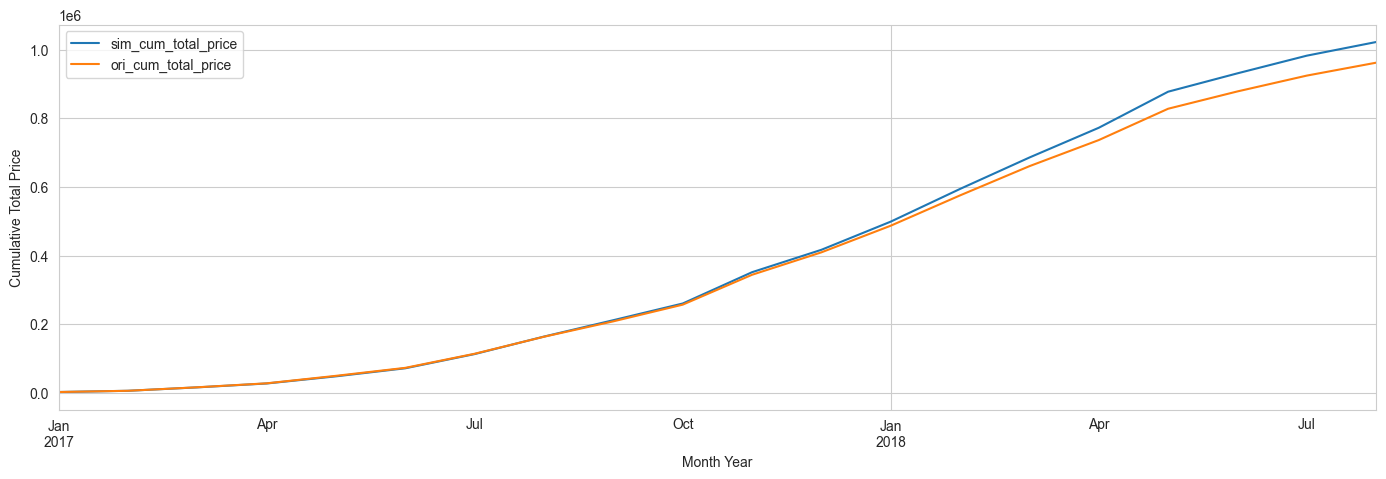

In [31]:
df_merged.set_index("month_year")[["sim_cum_total_price","ori_cum_total_price"]].plot(figsize=(17,5), kind="line")
plt.xlabel("Month Year")
plt.ylabel("Cumulative Total Price");

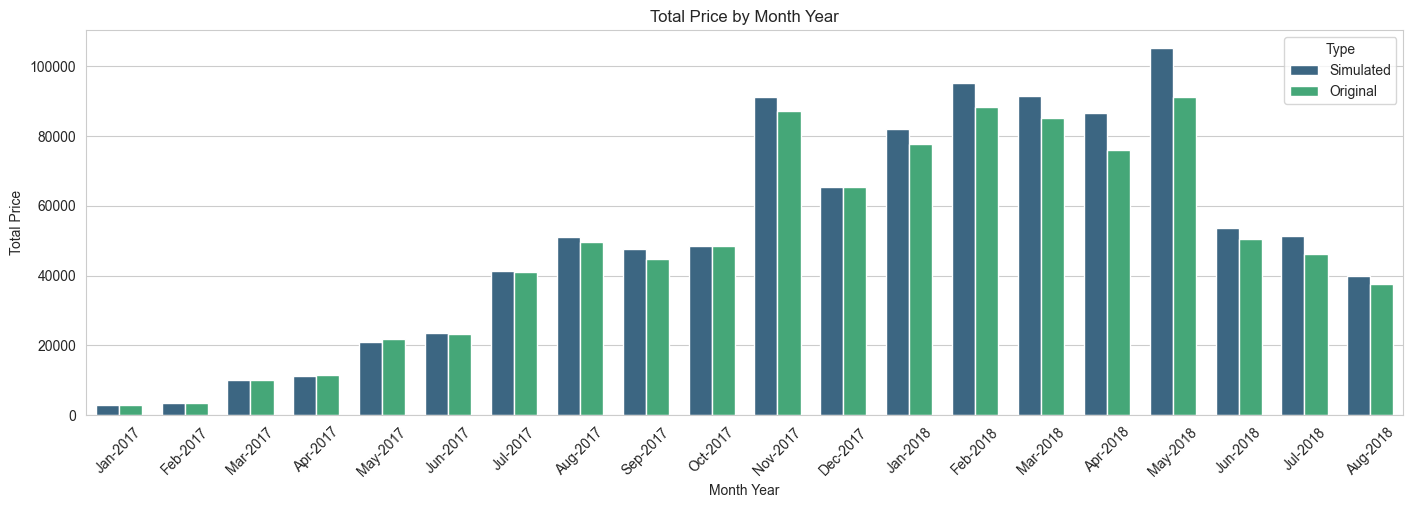

In [32]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_melt, x="month_name_year", y="total_price",hue="Type", palette='viridis', width=0.7);
plt.xlabel("Month Year")
plt.ylabel("Total Price");
plt.title("Total Price by Month Year");
plt.xticks(rotation=45);

### Observations

- We can see that that this pricing strategy is having a favorable result.
- The total revenue difference each month is not large enough theoretically to sway customer perception.


# Competitor Based Pricing

- In this strategy, we take the minimum price of all the competitors and apply it to current products every month.
- We also compare the product score between the the competitors and our store for filtering out products with highest product score in our store
- For eg: If a product has highest score between the competitors and our store, we apply the max possible price to the product and also prevent depreciation of the price




## Using competitor price

In [33]:
competition_columns=["product_id","month_year","qty", "unit_price", 'product_score','comp_1', 'ps1', 'comp_2', 'ps2',  'comp_3', 'ps3',  'lag_price']
competition_df = df[competition_columns].copy()
competition_df.loc[:,"new_unit_price"] = competition_df[["comp_1", "comp_2", "comp_3"]].min(axis=1)
competition_df["total_price"] = competition_df["qty"] * competition_df["new_unit_price"]

In [34]:
cdf_grouped=competition_df.groupby(["month_year"])["total_price"].sum().reset_index()
cdf_grouped["sim_cum_total_price"] = cdf_grouped["total_price"].cumsum()
df_merged=cdf_grouped.merge(df_grouped, on="month_year").rename(columns={"total_price_x": "simulated", "total_price_y":"original"})
df_melt=pd.melt(df_merged,id_vars="month_year", value_vars=["simulated","original"], var_name="type", value_name="total_price")

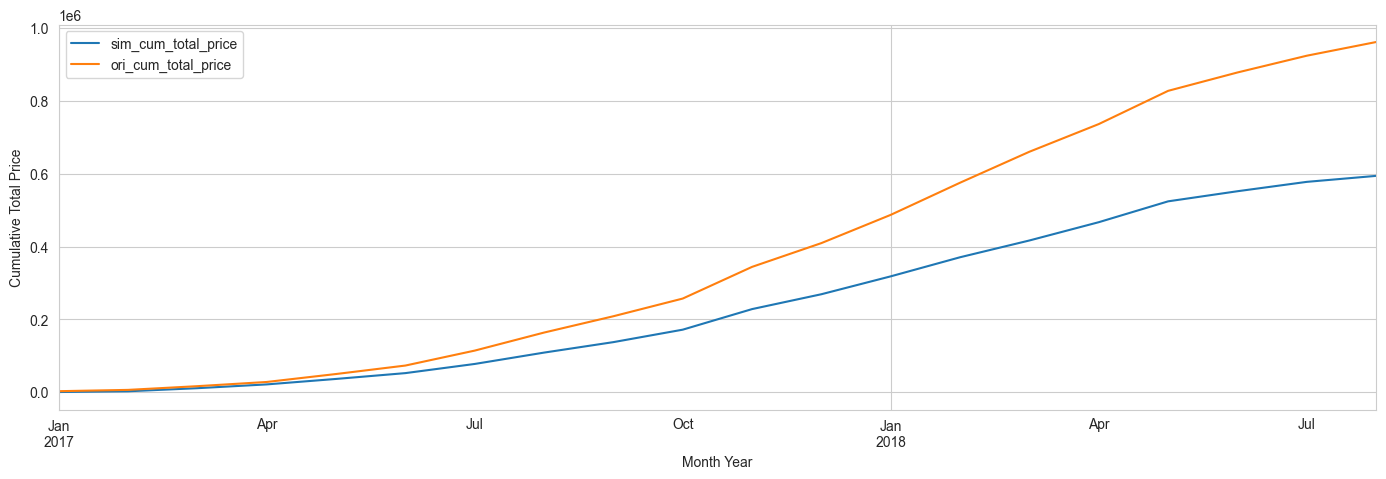

In [35]:
df_merged.set_index("month_year")[["sim_cum_total_price","ori_cum_total_price"]].plot(figsize=(17,5), kind="line")
plt.xlabel("Month Year")
plt.ylabel("Cumulative Total Price");

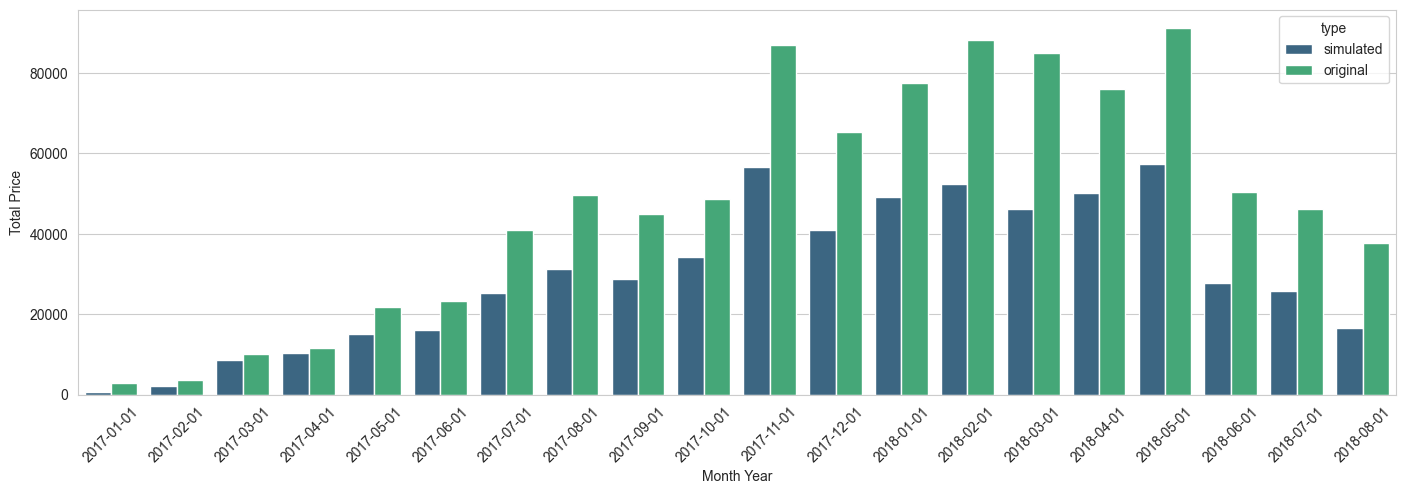

In [36]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_melt, x="month_year", y="total_price", palette='viridis', hue="type");
plt.xlabel("Month Year")
plt.ylabel("Total Price");
plt.xticks(rotation=45);

### Observations

- We can see that setting lowest prices among competitors is not a optimal strategy

# Using competitor price and product score

In this strategy we will use competitor price and product rating to determine the product price

In [37]:
competition_df

,product_id,month_year,qty,unit_price,product_score,comp_1,ps1,comp_2,ps2,comp_3,ps3,lag_price,new_unit_price,total_price
0,bed1,2017-05-01,1,45.950000,4.0,89.9,3.9,215.000000,4.4,45.95,4.0,45.900000,45.95,45.95
1,bed1,2017-06-01,3,45.950000,4.0,89.9,3.9,209.000000,4.4,45.95,4.0,45.950000,45.95,137.85
2,bed1,2017-07-01,6,45.950000,4.0,89.9,3.9,205.000000,4.4,45.95,4.0,45.950000,45.95,275.70
3,bed1,2017-08-01,4,45.950000,4.0,89.9,3.9,199.509804,4.4,45.95,4.0,45.950000,45.95,183.80
4,bed1,2017-09-01,2,45.950000,4.0,89.9,3.9,163.398710,4.4,45.95,4.0,45.950000,45.95,91.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,2017-05-01,1,215.000000,4.4,89.9,3.9,215.000000,4.4,45.95,4.0,214.950000,45.95,45.95
672,bed5,2017-06-01,10,209.000000,4.4,89.9,3.9,209.000000,4.4,45.95,4.0,215.000000,45.95,459.50
673,bed5,2017-07-01,59,205.000000,4.4,89.9,3.9,205.000000,4.4,45.95,4.0,209.000000,45.95,2711.05
674,bed5,2017-08-01,52,199.509804,4.4,89.9,3.9,199.509804,4.4,45.95,4.0,205.000000,45.95,2389.40


In [38]:
def set_price(row):
    current_product_rating=row["product_score"]
    current_product_price=row["unit_price"]
    max_product_price=current_product_price

    if(current_product_rating < row["least_product_rating"]):
        max_product_price= min(row["comp_1"],current_product_price, row["comp_2"], row["comp_3"])

    elif(current_product_rating > row["highest_product_rating"]):
        max_product_price= max(row["comp_1"],current_product_price, row["comp_2"], row["comp_3"])
    
    return max_product_price

In [39]:
"""
In the following 
- we calculate the lowest and highest product rating for each product across the three competitors.
- we then check if our product rating is less than the lowest product rating, we set the max price to the minimum price of the three competitors.
- else if our product rating is greater than the highest product rating, we set the max price to the maximum price of the three competitors.
"""

competition_df["least_product_rating"] = competition_df[["ps1", "ps2", "ps3"]].min(axis=1)
competition_df["highest_product_rating"] = competition_df[["ps1", "ps2", "ps3"]].max(axis=1)
competition_df.loc[:,"new_unit_price"] = competition_df.apply(set_price, axis=1)
competition_df["total_price"] = competition_df["qty"] * competition_df["new_unit_price"]

In [40]:
cdf_grouped=competition_df.groupby(["month_year"])["total_price"].sum().reset_index()
cdf_grouped["sim_cum_total_price"] = cdf_grouped["total_price"].cumsum()
df_merged=cdf_grouped.merge(df_grouped, on="month_year").rename(columns={"total_price_x": "Simulated", "total_price_y":"Original"})
df_melt=pd.melt(df_merged,id_vars="month_name_year", value_vars=["Simulated","Original"], var_name="Type", value_name="total_price")

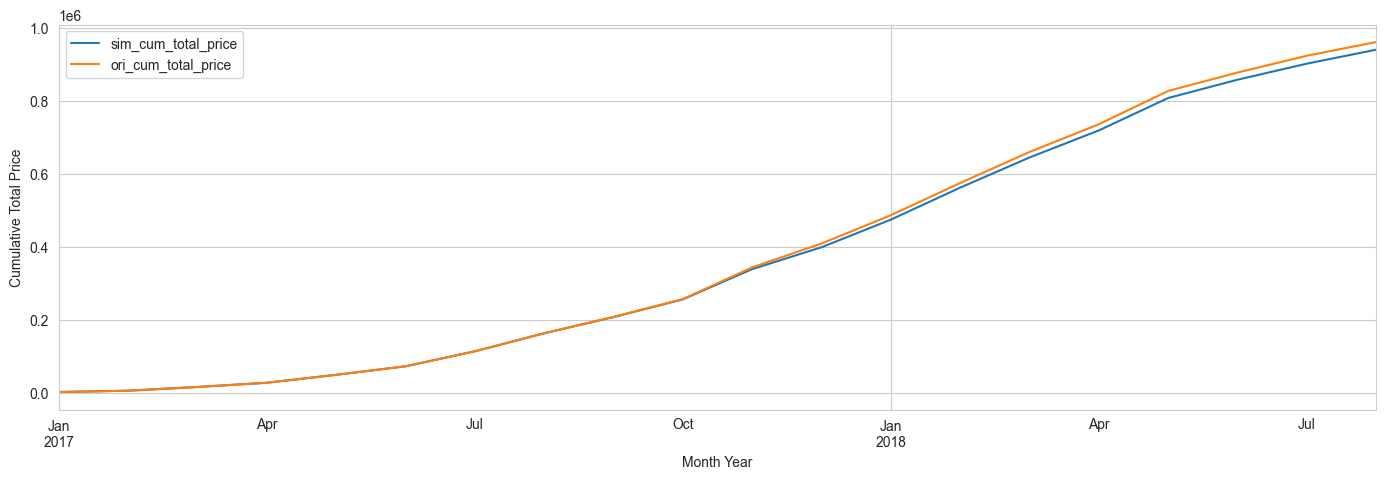

In [41]:
df_merged.set_index("month_year")[["sim_cum_total_price","ori_cum_total_price"]].plot(figsize=(17,5), kind="line")
plt.xlabel("Month Year")
plt.ylabel("Cumulative Total Price");

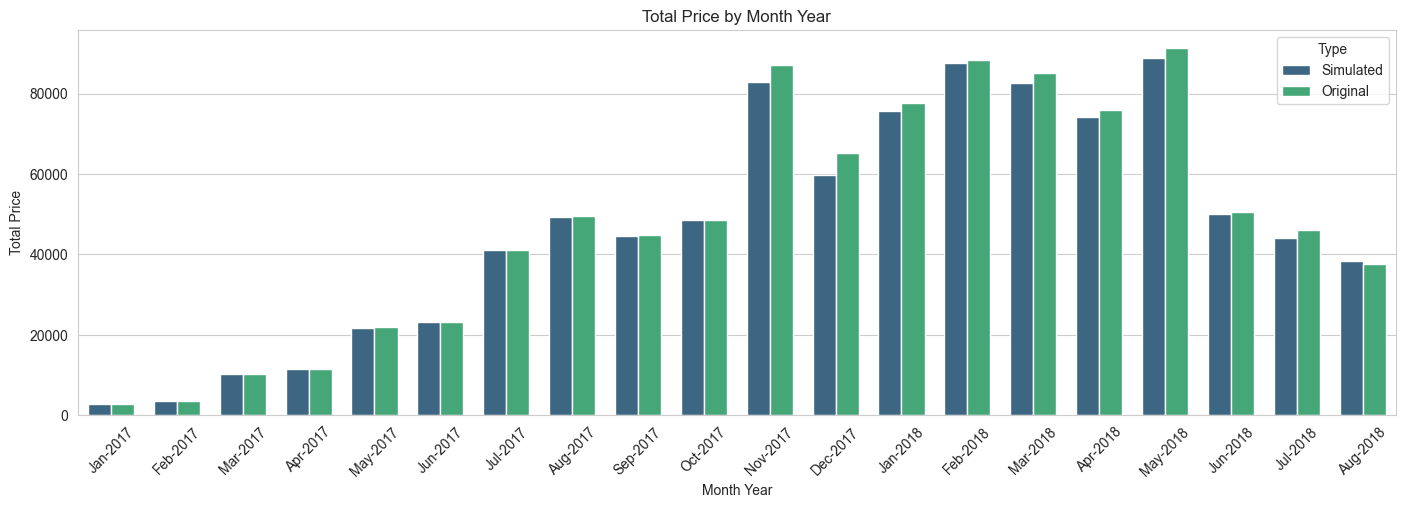

In [42]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_melt, x="month_name_year", y="total_price",hue="Type", palette='viridis', width=0.7);
plt.xlabel("Month Year")
plt.ylabel("Total Price");
plt.title("Total Price by Month Year");
plt.xticks(rotation=45);

### Observations

- We can see that that this pricing strategy does not have a favorable result.
- The total revenue each month is less than the original data


# Dynamic Pricing

Price optimization using price elasticity of demand is a strategy that aims to determine the optimal price for a product or service based on its demand elasticity.  
Price elasticity of demand measures the responsiveness of demand to changes in price. By analyzing the price elasticity, businesses can understand how sensitive customers are to price changes and make informed decisions to maximize their revenue and profitability.

In [43]:
sales_df=db.sql(""" 
    select product_id, product_category_name, month_year, qty, total_price,	freight_price, unit_price, customers, month, year, comp_1, fp1, comp_2, fp2, comp_3, fp3, lag_price from df 
    """).to_df()

"""
Following code is used to calculate the lag quantity for each product.
"""
sales_df=db.sql(""" 
    select *, lag(qty,1,0) over (partition by product_id, product_category_name order by year,month) as lag_qty from sales_df
""").to_df()

In [44]:
"""
In the following code
- we calculate the price change percentage by subtracting the lag price from the unit price and dividing it by the lag price.
- we calculate the quantity change percentage by subtracting the lag quantity from the quantity and dividing it by the lag quantity.
- we calculate the price elasticity of demand by dividing the quantity change percentage by the price change percentage.
"""

# 
sales_df["price_change_pct"]=((sales_df["unit_price"]-sales_df["lag_price"])/sales_df["lag_price"])
sales_df["qty_change_pct"]=((sales_df["qty"]-sales_df["lag_qty"])/sales_df["lag_qty"])
sales_df["price_elasticity_of_demand"]=sales_df["qty_change_pct"]/sales_df["price_change_pct"]
sales_df["ped_inf"] = np.where(sales_df["price_elasticity_of_demand"]==np.inf,1,0)
sales_df["ped_inf"] = np.where(sales_df["price_elasticity_of_demand"]==-np.inf,-1,sales_df["ped_inf"])
sales_df["price_elasticity_of_demand"]=sales_df["price_elasticity_of_demand"].replace([np.inf, -np.inf], [100, -100])
sales_df["clipped_price_elasticity_of_demand"]=np.clip(sales_df["price_elasticity_of_demand"], -100, 100)

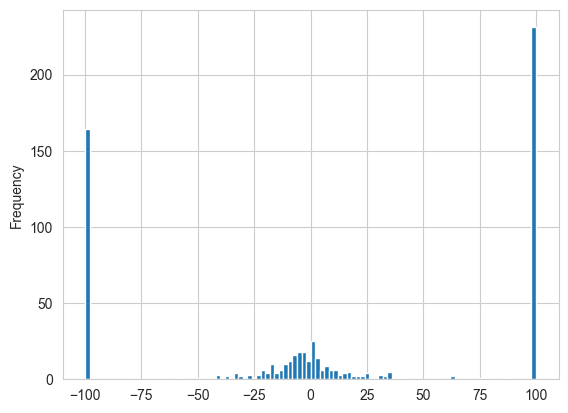

In [45]:
sales_df["clipped_price_elasticity_of_demand"].plot(kind="hist", bins=100);

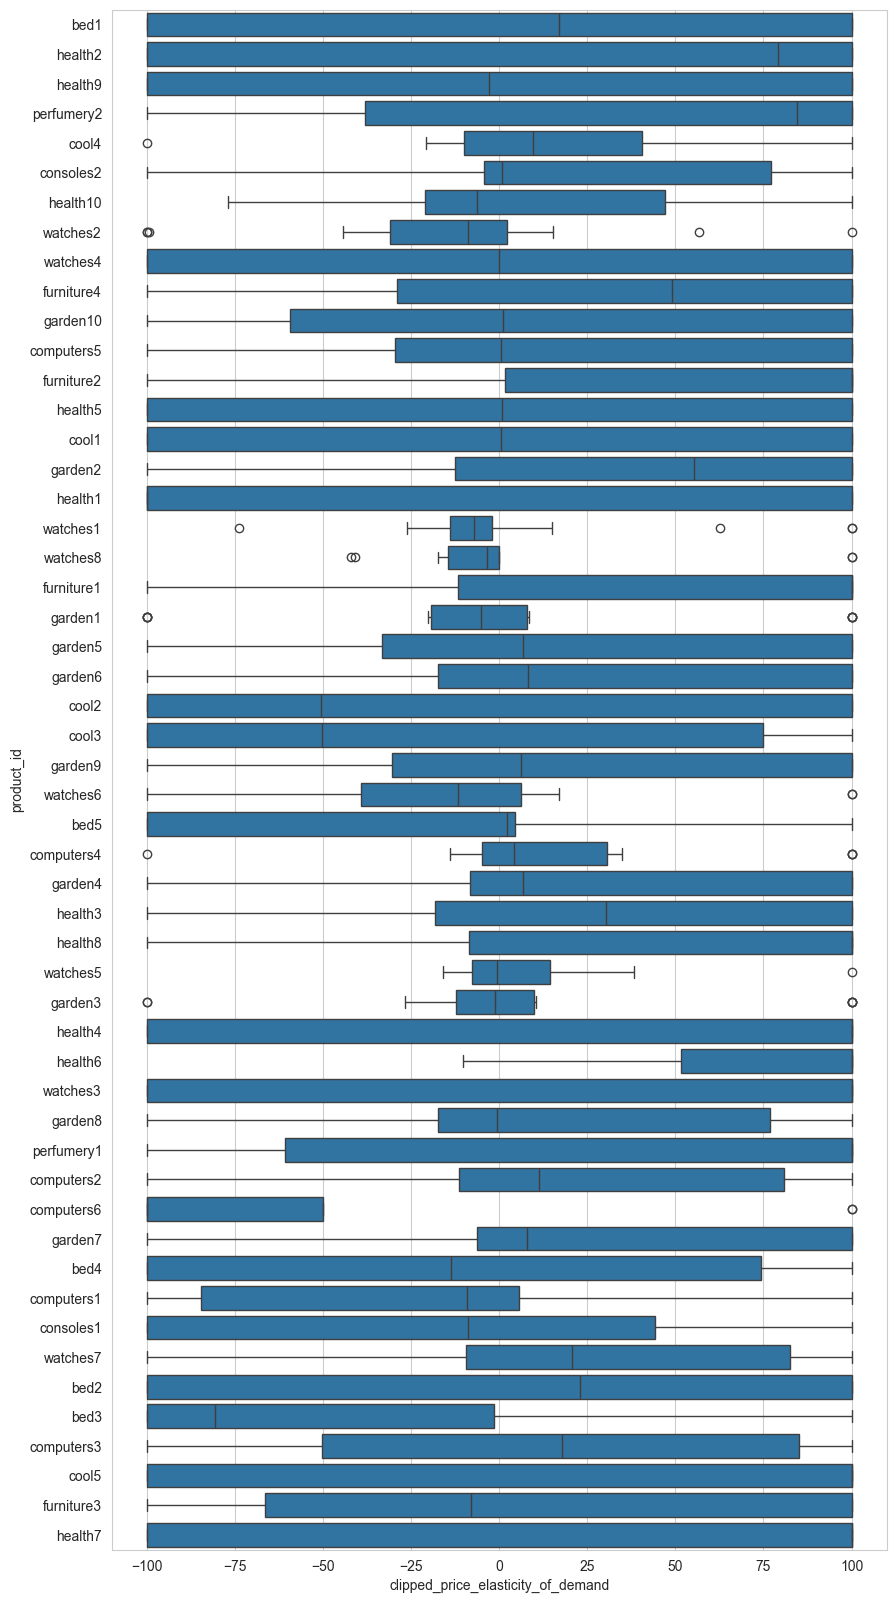

In [46]:
plt.figure(figsize=(10,20))
sns.boxplot(y="product_id", x="clipped_price_elasticity_of_demand", data=sales_df);

### Observations

- In above plot we check the price elasticity of demand for each product

In [47]:
"""
 Following code is used to calculate the median elasticity of demand for each product and bin the products as elastic or inelastic
"""
sales_df["median_ped"] = sales_df.groupby(["product_id"])["clipped_price_elasticity_of_demand"].transform("median")
sales_df["Ped_bins"] = np.where(abs(sales_df["median_ped"]) >=10,"Elastic","Inelastic")

In [48]:
"""
Following code is used to calculate the dynamic price for each product based on the price elasticity of demand.
We are setting the dynamic price as the max price for inelastic products
"""
value_df=value_df.merge(sales_df.groupby(["product_id"])["Ped_bins"].agg(pd.Series.mode), on="product_id")
value_df["dynamic_price"]=np.where(value_df["Ped_bins"]=="Inelastic", value_df["max_price"], np.nan)

In [49]:
dynamic_columns = ['product_id', 'month_year', 'qty',
       'total_price', 'unit_price', 
       'product_score', 'month',
       'year','comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price']
dynamic_price_df=df[dynamic_columns].copy()

In [50]:
"""
Following code is used to fill the missing price values with the unit price for elastic products 
"""

dynamic_price_df=dynamic_price_df.merge(value_df.query("Ped_bins == 'Inelastic'")[["product_id","dynamic_price"]], on="product_id", how="left")
dynamic_price_df["dynamic_price"]=dynamic_price_df["dynamic_price"].fillna(dynamic_price_df["unit_price"])
dynamic_price_df["total_price"] = dynamic_price_df["qty"] * dynamic_price_df["dynamic_price"]
dynamic_price_df_grouped = dynamic_price_df.groupby(["month_year"])["total_price"].sum().reset_index()

In [51]:
merged = df_grouped.merge(dynamic_price_df_grouped, on="month_year").rename(columns={"total_price_x": "Original", "total_price_y": "Simulated"})
merged["cumulative_original_total_price"] = merged["Original"].cumsum()
merged["cumulative_dynamic_total_price"] = merged["Simulated"].cumsum()
df_melted = pd.melt(merged, id_vars="month_name_year", value_vars=["Original", "Simulated"], var_name="Type", value_name="total_price")

   month_name_year  cumulative_original_total_price  \
0         Jan-2017                          2864.19   
1         Feb-2017                          6448.30   
2         Mar-2017                         16652.68   
3         Apr-2017                         28177.30   
4         May-2017                         50020.63   
5         Jun-2017                         73265.87   
6         Jul-2017                        114315.76   
7         Aug-2017                        163866.17   
8         Sep-2017                        208692.77   
9         Oct-2017                        257262.15   
10        Nov-2017                        344271.92   
11        Dec-2017                        409583.28   
12        Jan-2018                        487152.90   
13        Feb-2018                        575428.85   
14        Mar-2018                        660478.70   
15        Apr-2018                        736455.88   
16        May-2018                        827679.34   
17        

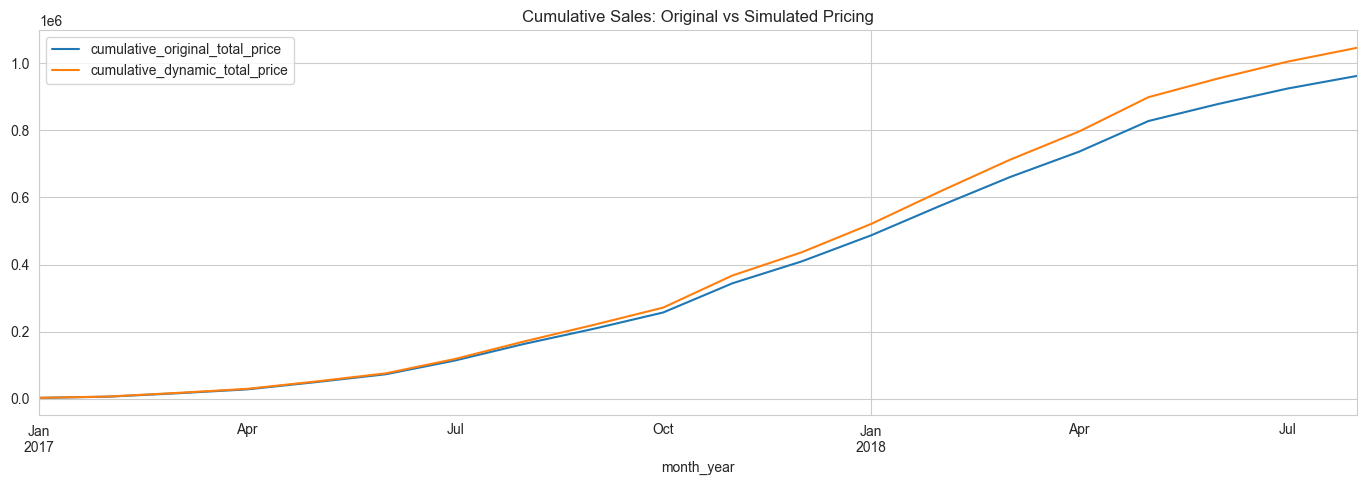

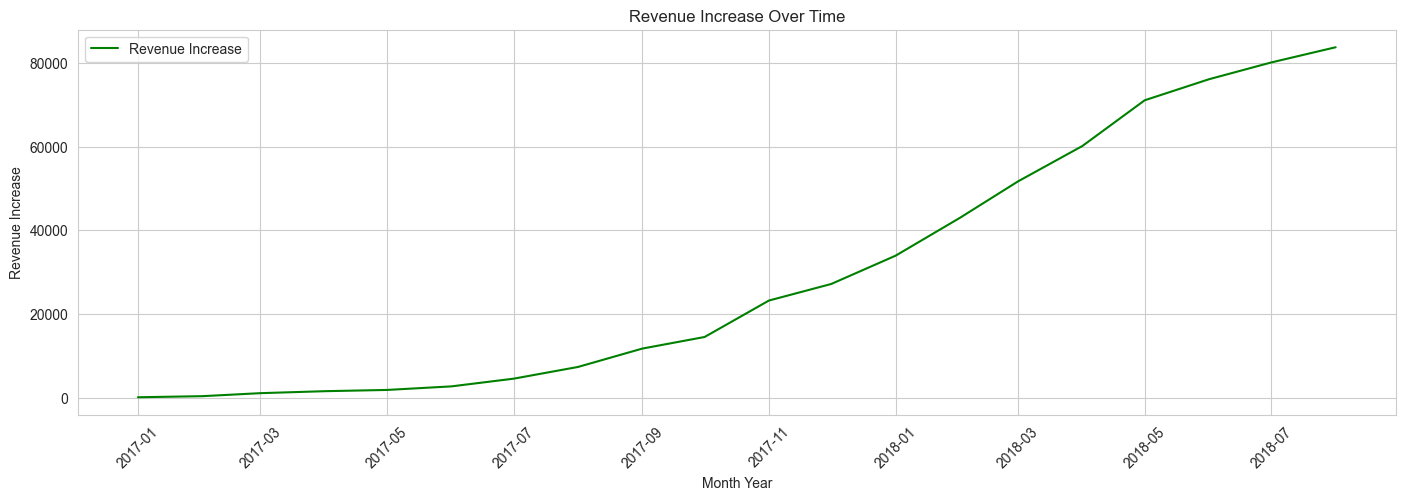

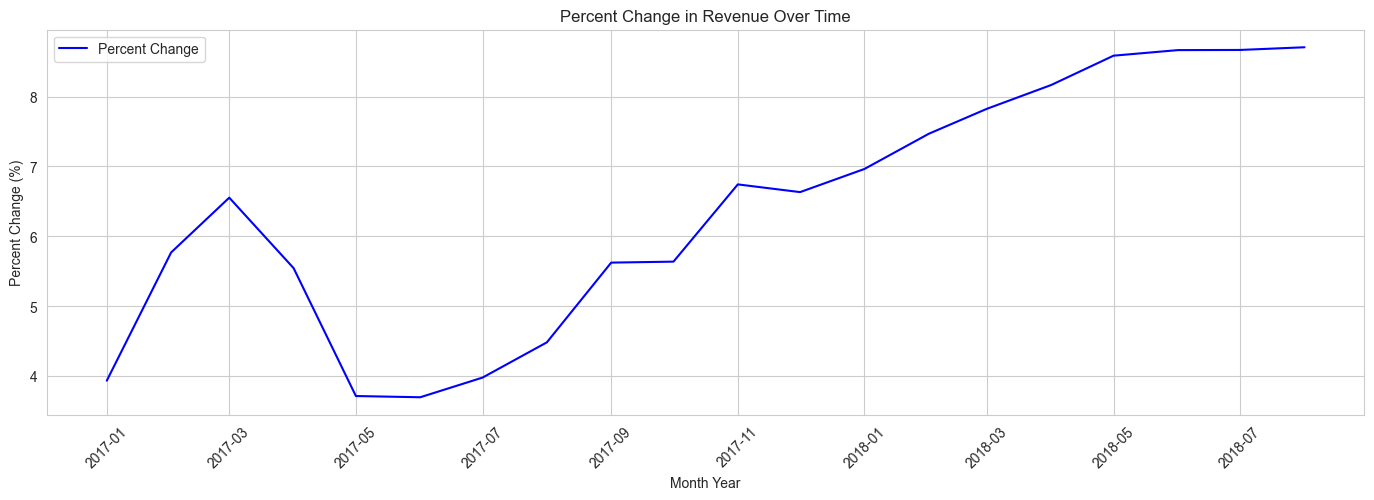

In [52]:
# Calculate cumulative total sales for both original and simulated prices
merged["cumulative_original_total_price"] = merged["Original"].cumsum()
merged["cumulative_dynamic_total_price"] = merged["Simulated"].cumsum()

merged["revenue_increase"] = merged["cumulative_dynamic_total_price"] - merged["cumulative_original_total_price"]

merged["percent_change"] = (merged["revenue_increase"] / merged["cumulative_original_total_price"]) * 100

merged.set_index("month_year")[["cumulative_original_total_price", "cumulative_dynamic_total_price"]].plot(kind="line", figsize=(17,5), title="Cumulative Sales: Original vs Simulated Pricing");

print(merged[["month_name_year", "cumulative_original_total_price", "cumulative_dynamic_total_price", "revenue_increase", "percent_change"]])

# You can also plot the revenue increase and percent change over time
plt.figure(figsize=(17,5))
plt.plot(merged["month_year"], merged["revenue_increase"], label="Revenue Increase", color="green")
plt.xlabel("Month Year")
plt.ylabel("Revenue Increase")
plt.title("Revenue Increase Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(17,5))
plt.plot(merged["month_year"], merged["percent_change"], label="Percent Change", color="blue")
plt.xlabel("Month Year")
plt.ylabel("Percent Change (%)")
plt.title("Percent Change in Revenue Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()


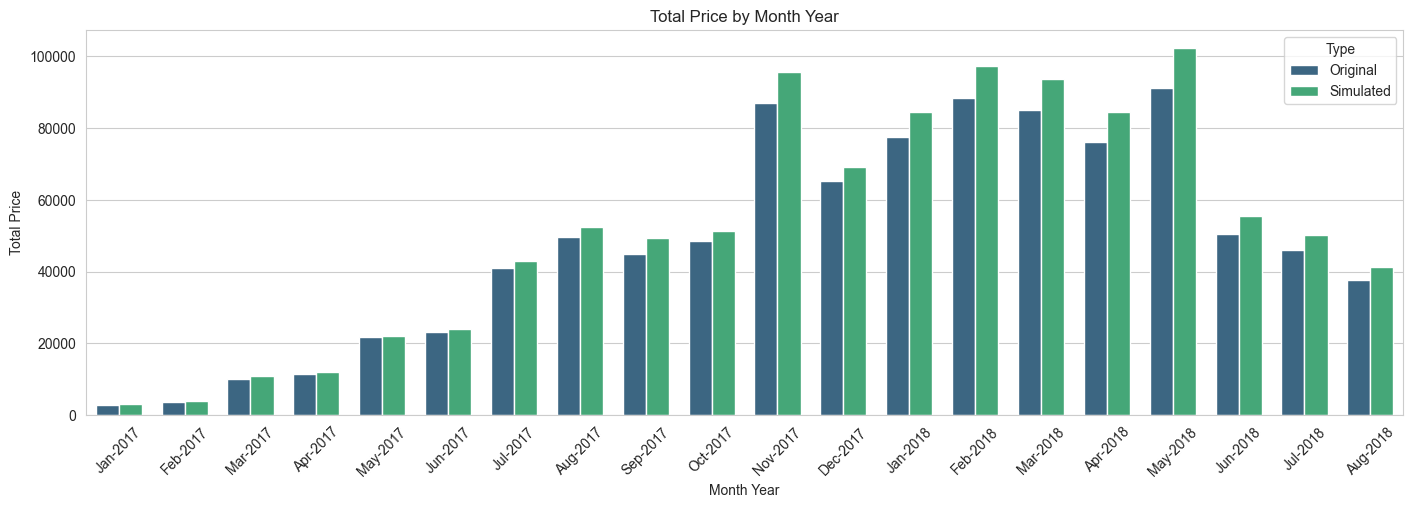

In [53]:
plt.figure(figsize=(17,5))
sns.barplot(data=df_melted, x="month_name_year", y="total_price",hue="Type", palette='viridis', width=0.7);
plt.xlabel("Month Year")
plt.ylabel("Total Price");
plt.title("Total Price by Month Year");
plt.xticks(rotation=45);

### Observations

- We can see that that this pricing strategy have a favorable result.
- The total revenue each month is more than the original total revenue.

# Final Prices
Following are the final prices for each product for the upcoming month

In [52]:
upcoming_prices_df= dynamic_price_df.groupby("product_id")["dynamic_price"].last().reset_index().merge(value_df[["product_id","monthly_depreciation_amt", "Ped_bins"]], on="product_id")
upcoming_prices_df["final_price"]=np.where(upcoming_prices_df["Ped_bins"]=="Inelastic", upcoming_prices_df["dynamic_price"]-upcoming_prices_df["monthly_depreciation_amt"], upcoming_prices_df["dynamic_price"])

In [53]:
upcoming_prices_df[["product_id", "final_price"]].round(2)

,product_id,final_price
0,bed1,39.24
1,bed2,74.00
2,bed3,84.90
3,bed4,47.90
4,bed5,213.92
5,computers1,109.48
6,computers2,77.90
7,computers3,132.97
8,computers4,159.43
9,computers5,158.84


In [54]:
upcoming_prices_df[["product_id", "final_price"]].round(2).to_csv("final_prices.csv", index=False)

# Recommendations 


## Pricing Strategy
- In terms of pricing strategy, the Price Elasticity to Demand strategy seems most effective. This strategy is completely based on customer demand and reaction to change in price. 
- In this strategy, we have only changed the prices of products that are Inelastic, i.e. the products who change in price does not affect customer demand.
- This also resulted in higher sales for all the months. 

## Product Related
- Holidays are extremely important. Months with higher number of holidays have higher sales.  
- Due to higher number of customers during holidays, new products can be introduced to increase awareness. 
- Product description length should be around 1000 characters. 


# Conclusion

- Our analysis highlights the critical role of price elasticity in optimizing our pricing strategy. By focusing on products with inelastic demand, we were able to adjust prices without negatively impacting customer demand, effectively increasing sales across all months. This targeted approach ensures that we are maximizing revenue by raising prices only where customer sensitivity to price changes is low which allows us to streamline our pricing decisions and ensures sustainable growth through smarter, data-driven price optimization.
